#1 使用GBDT对鸢尾花数据进行分类

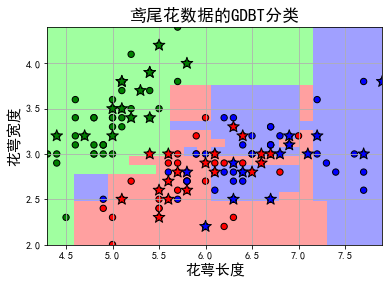

准确度: 71.11%
1  错误率: 28.89%


2  错误率: 31.11%
3  错误率: 35.56%


4  错误率: 37.78%
5  错误率: 33.33%


6  错误率: 31.11%
7  错误率: 28.89%


8  错误率: 35.56%
9  错误率: 31.11%


10  错误率: 33.33%
11  错误率: 35.56%


12  错误率: 33.33%
13  错误率: 33.33%


14  错误率: 33.33%


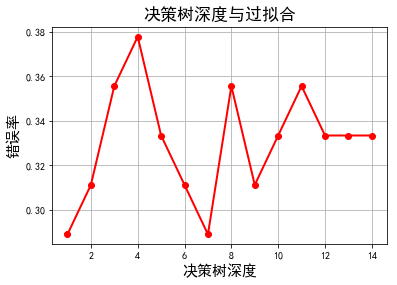

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('data/iris.data', header=None)
x = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

x = x.iloc[:, :2]# 为了可视化，仅使用前两列特征
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

# 决策树参数估计
model = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0) #使用信息熵来划分子树，gini：使用gini系数划分子树
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)      # 测试数据

# 画图
N, M = 50,50 # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点


cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15)
plt.ylabel(iris_feature[1], fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的GDBT分类', fontsize=17)
plt.show()

# 训练集上的预测结果
y_test = y_test.reshape(-1)
result = (y_test_hat == y_test)   # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

# 过拟合：错误率
depth = np.arange(1, 15)
err_list = []
for d in depth:
    clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=d, random_state=0)
    clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)  # 测试数据
    result = (y_test_hat == y_test)  # True则预测正确，False则预测错误

    err = 1 - np.mean(result)
    err_list.append(err)
    print(d, ' 错误率: %.2f%%' % (100 * err))
plt.figure(facecolor='w')
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'决策树深度', fontsize=15)
plt.ylabel(u'错误率', fontsize=15)
plt.title(u'决策树深度与过拟合', fontsize=17)
plt.grid(True)
plt.show()